# Task 1: Acquire, preprocess, and analyze the data

## 20 news group dataset


In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
twenty_train = fetch_20newsgroups(subset='train', remove=(['headers', 'footers', 'quotes']), shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', remove=(['headers', 'footers', 'quotes']), shuffle=True, random_state=42)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize the training data 
count_vect = CountVectorizer()
Xtrain_ngroups = count_vect.fit_transform(twenty_train.data)

Xtest_ngroups = count_vect.transform(twenty_test.data)
Ytest_ngroups = twenty_test.target


In [4]:
Xtrain_ngroups = Xtrain_ngroups

In [5]:
Xtrain_ngroups.shape

(11314, 101631)

In [6]:
Ytrain_ngroups = twenty_train.target

In [7]:
Ytrain_ngroups

array([7, 4, 4, ..., 3, 1, 8])

In [8]:
Ytrain_ngroups.shape

(11314,)

### Statitics

In [9]:
# number of sentences in each class/label 

num_labels = {}
for target in twenty_train.target_names:
  num_labels[target] = 0

tnames = twenty_train.target_names
ty = twenty_train.target
tx = twenty_train.data
for i in range(len(ty)):
  num_labels[tnames[ty[i]]] += 1

Text(0.5, 1.0, 'Number of instance per class (20 news group dataset)')

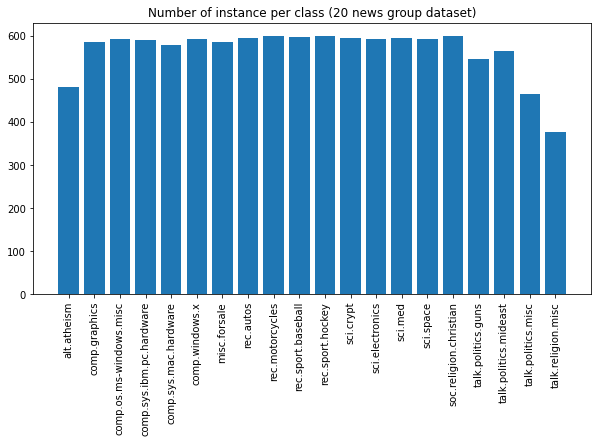

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(tnames))
plt.figure(figsize=(10,5))
plt.bar(x, height=num_labels.values(), linewidth=2.0)
plt.xticks(x, num_labels.keys(), rotation=90)
plt.title("Number of instance per class (20 news group dataset)")

## Sentiment140 dataset

In [11]:
import pandas as pd

In [12]:
sentiment_train = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1')
sentiment_train.columns = ['Class', 'Id', 'Date','Query', 'User', 'Tweet']

In [13]:
sentiment_test = pd.read_csv('testdata.manual.2009.06.14.csv', encoding='latin-1')
sentiment_test.columns = ['Class', 'Id', 'Date','Query', 'User', 'Tweet']

In [14]:
sentiment_train.head(5)

,Class,Id,Date,Query,User,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [15]:
sentiment_test.head(5)

,Class,Id,Date,Query,User,Tweet
0,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
1,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
2,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
3,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
4,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...


In [16]:
xtrain_sentiment, ytrain_sentiment = sentiment_train['Tweet'].to_numpy(), sentiment_train['Class'].to_numpy()
xtest_sentiment, ytest_sentiment = sentiment_test['Tweet'].to_numpy(), sentiment_test['Class'].to_numpy()

In [17]:
# vectorize the sentiment dataset

count_vect = CountVectorizer()
xtrain_sentiment = count_vect.fit_transform(xtrain_sentiment[790000:810000])
xtest_sentiment = count_vect.transform(xtest_sentiment)
ytrain_sentiment = ytrain_sentiment[790000:810000]

In [18]:
xtrain_sentiment = xtrain_sentiment.toarray()

In [19]:
for i in range(len(ytrain_sentiment)):
    if(ytrain_sentiment[i] == 4):
        ytrain_sentiment[i] = 1

In [20]:
xtest_sentiment = xtest_sentiment.toarray()

In [21]:
# remove the data with label=2 from the dataset
xt_sentiment = []
yt_sentiment = []

for i, y in enumerate(ytest_sentiment):
  if y != 2:
    xt_sentiment.append(xtest_sentiment[i])
    if y == 4:
      yt_sentiment.append(1)
    else:
      yt_sentiment.append(y)
  

In [22]:
xtest_sentiment = xt_sentiment
ytest_sentiment = yt_sentiment

### Statistics

In [23]:
nlabels = {'positive': 0, 'negative': 0}

for y in yt_sentiment:
  if y == 0:
    nlabels['negative'] += 1
  else:
    nlabels['positive'] += 1


Text(0.5, 1.0, 'Number of instance per class (Sentiment140 Dataset)')

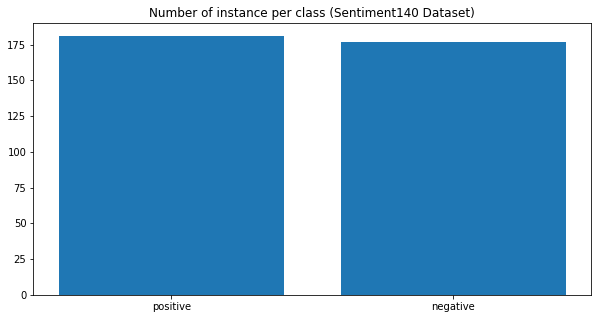

In [24]:
x = np.arange(2)
plt.figure(figsize=(10,5))
plt.bar(x, height=nlabels.values())
plt.xticks(x, nlabels.keys())
plt.title("Number of instance per class (Sentiment140 Dataset)")

# Task 2: Naive Bayes and K-fold cross validation


## Multinomial Naive Bayes

In [25]:
import numpy as np

In [26]:
class MultinomialNaiveBayes:
    
    def __init__(self,alpha = 1.0):
      self.alpha = alpha
      return
    
    def fit(self, x, y):
      N, D = x.shape
      C = np.max(y) + 1
      # one parameter for each feature conditioned on each class
      theta = np.zeros((C,D))
      Nc = np.zeros(C) # number of instances in class c
      # for each class get the MLE for theata
      for c in range(C):
          x_c = x[y == c]                           #slice all the elements from class c
          Nc[c] = x_c.shape[0]                      #get number of elements of class c
          total = np.sum(x_c) + self.alpha * D
          theta[c,:] = (np.sum(x_c,0)+self.alpha)/total                #theta of features of class c (sum rows together)
          
      self.pi = (Nc + self.alpha)/(N + C*self.alpha)
      self.theta = theta                                             
      return self

def logsumexp(Z):                                                # dimension C x N
    Zmax = np.max(Z,axis=0)[None,:]                              # max over C
    log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
    return log_sum_exp

def predict(self, xt):
    Nt, D = xt.shape
    # print(self.theta.shape)
    log_theta = np.log(self.theta)[:,None,:]      # log theta, shape C x D -> C x 1 x D
    log_prior = np.log(self.pi)[:, None]          # shape C x 1
    xt = xt[None,:,:]                             # change shape from N x D -> 1 x N x D
    term_prod = xt* log_theta                     # x_d * log (theta_(d,y)) -> gives shape C x N x D
    log_likelihood = np.sum(term_prod,2)          # sum along axis 2, thus log_likehood change from shape C x N x D -> C x N
    log_posterior = log_prior + log_likelihood    # C x 1 + C x N -> C x N
    posterior = np.exp(log_posterior - logsumexp(log_posterior))
    final_posterior = np.argmax(posterior.T, 1)
    return final_posterior                                                  # dimension N x C
def evaluate_acc(self,y_pred,y_true):
    return np.sum(y_pred == y_true)/y_true.shape[0]
MultinomialNaiveBayes.predict = predict
MultinomialNaiveBayes.evaluate_acc = evaluate_acc

## K fold related functions

In [27]:
def kfoldCV(x_train,y_train,x_test,y_test,model):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  return np.sum(y_pred == y_test)/y_test.shape[0]

def cross_validation_split(x_data,y_data,k,model):
  N = x_data.shape[0]
  all_acc = np.zeros(k)
  # model = MultinomialNaiveBayes(hyper_para)
  for i in range(k):
    start_index = int(i * N/k) 
    end_index = int(start_index + N/k)
    x_test = x_data[start_index:end_index]
    y_test = y_data[start_index:end_index]
    x_train = np.delete(x_data,np.s_[start_index:end_index],0)
    y_train = np.delete(y_data,np.s_[start_index:end_index],0)
    all_acc[i] = kfoldCV(x_train,y_train,x_test,y_test,model)
  return np.average(all_acc)

# Task 3: Run experiments

## Sampling Train and Test dataset

In [28]:
x_train_ngroups = Xtrain_ngroups.toarray()[:2000]
y_train_ngroups = Ytrain_ngroups[:2000]
x_test_ngroups = Xtest_ngroups.toarray()[:500]
y_test_ngroups = Ytest_ngroups[:500]

x_train_sentiment = xtrain_sentiment[9000:11000]
y_train_sentiment = ytrain_sentiment[9000:11000]
x_test_sentiment = np.stack(xtest_sentiment, axis=0)
y_test_sentiment = np.stack(ytest_sentiment, axis=0)

## Find Best Hyperparameters

### 20 News groups dataset

In [29]:
from sklearn.linear_model import LogisticRegression

#### Naive Bayes

In [30]:
# best alpha for multinomial naive bayes for ngroups dataset
alpha_range = np.linspace(0.1,1,10)
result_list = []
alpha_index = []
for alpha in alpha_range:
    alpha = alpha.round(1)
    model = MultinomialNaiveBayes(alpha=alpha)
    avg_acc = cross_validation_split(x_train_ngroups,y_train_ngroups,5,model)
    result_list.append([alpha,5,avg_acc])
        
df = pd.DataFrame(result_list,columns=["Alpha","K fold","Avg Acc"])
df = df.sort_values(by="Avg Acc",ascending=False)
print(df)
# model_test = MultinomialNaiveBayes(0.1)
# model_test.fit(x_train_ngroups,y_train_ngroups)
# best_pred = model_test.predict(x_test_ngroups)
# print("Accuracy on test dataset with the best smoothing parameter: " ,model_test.evaluate_acc(best_pred,y_test_ngroups))

   Alpha  K fold  Avg Acc
0    0.1       5   0.5105
1    0.2       5   0.4420
2    0.3       5   0.3800
3    0.4       5   0.3465
4    0.5       5   0.3160
5    0.6       5   0.2895
6    0.7       5   0.2700
7    0.8       5   0.2565
8    0.9       5   0.2430
9    1.0       5   0.2320


#### Softmax

In [31]:
# best hyperparameters (C values and Panalty) of softmaxt for ngroups dataset
reg_range = np.linspace(1,2,10)
result_list = []
penalty_list = ["l2","l1"]
reg_range = np.linspace(1,2,11)
for hyper1 in penalty_list:
    for hyper2 in reg_range[:7]:
        model = LogisticRegression(solver="liblinear",penalty=hyper1,C=hyper2,max_iter=800) # hyper parameters to tune
        avg_acc = cross_validation_split(x_train_ngroups,y_train_ngroups,5,model)
        result_list.append([hyper1,hyper2,5,avg_acc])
df = pd.DataFrame(result_list,columns=["Penalty","C_val","K fold","Avg Acc"])
df.index.name="line"
df = df.sort_values(by="Avg Acc",ascending=False)
print(df)

     Penalty  C_val  K fold  Avg Acc
line                                
10        l1    1.3       5   0.4895
11        l1    1.4       5   0.4860
8         l1    1.1       5   0.4855
9         l1    1.2       5   0.4855
7         l1    1.0       5   0.4835
13        l1    1.6       5   0.4835
12        l1    1.5       5   0.4825
0         l2    1.0       5   0.4760
1         l2    1.1       5   0.4760
4         l2    1.4       5   0.4755
3         l2    1.3       5   0.4750
2         l2    1.2       5   0.4745
5         l2    1.5       5   0.4745
6         l2    1.6       5   0.4730


### Sentiment140 dataset

#### Naive Bayes

In [32]:
# best alpha for multinomial of sentiment
alpha_range = np.linspace(0,1,11)
result_list = []
alpha_index = []
for alpha in alpha_range[1:]:
    alpha = alpha.round(1)
    model = MultinomialNaiveBayes(alpha=alpha)
    avg_acc = cross_validation_split(x_train_sentiment,y_train_sentiment,5,model)
    result_list.append([alpha,5,avg_acc])
        
df = pd.DataFrame(result_list,columns=["Alpha","K fold","Avg Acc"])
df = df.sort_values(by="Avg Acc",ascending=False)
print(df)
# model_test = MultinomialNaiveBayes(0.1)
# model_test.fit(x_train_sentiment,y_train_sentiment)
# best_pred = model_test.predict(x_test_sentiment)
# print("Accuracy on test dataset with the best smoothing parameter: " ,model_test.evaluate_acc(best_pred,y_test_sentiment))

   Alpha  K fold  Avg Acc
0    0.1       5   0.6990
1    0.2       5   0.6500
2    0.3       5   0.6085
3    0.4       5   0.5645
4    0.5       5   0.5455
5    0.6       5   0.5210
6    0.7       5   0.5040
7    0.8       5   0.4905
8    0.9       5   0.4800
9    1.0       5   0.4725


#### Softmax

In [33]:
# best hyperparameters (C values and Panalty) for sentiment dataset
reg_range = np.linspace(1,2,10)
result_list = []
penalty_list = ["l2","l1"]
reg_range = np.linspace(1,2,11)
for hyper1 in penalty_list:
    for hyper2 in reg_range[:7]:
        model = LogisticRegression(solver="liblinear",penalty=hyper1,C=hyper2,max_iter=800) # hyper parameters to tune
        avg_acc = cross_validation_split(x_train_sentiment,y_train_sentiment,5,model)
        result_list.append([hyper1,hyper2,5,avg_acc])
df = pd.DataFrame(result_list,columns=["Penalty","C_val","K fold","Avg Acc"])
df.index.name="line"
df = df.sort_values(by="Avg Acc",ascending=False)
print(df)

     Penalty  C_val  K fold  Avg Acc
line                                
13        l1    1.6       5   0.6825
6         l2    1.6       5   0.6795
12        l1    1.5       5   0.6790
5         l2    1.5       5   0.6785
4         l2    1.4       5   0.6775
11        l1    1.4       5   0.6760
3         l2    1.3       5   0.6750
2         l2    1.2       5   0.6745
1         l2    1.1       5   0.6735
10        l1    1.3       5   0.6735
9         l1    1.2       5   0.6715
0         l2    1.0       5   0.6705
8         l1    1.1       5   0.6685
7         l1    1.0       5   0.6655


## Compare Models with Best Hyperparameters

In [34]:
import time

### Sentiment140 dataset

In [35]:
# compare sentiment dataset (average runtime for 10 times of prediction)
reg_times = []
byes_times = []
reg_model = LogisticRegression(penalty="l1",C=1.6,solver="liblinear",max_iter=800)
byes_model = MultinomialNaiveBayes(alpha=0.1)

start = time.time()
reg_model.fit(x_train_sentiment,y_train_sentiment)
end = time.time()
reg_fittime = end-start

start = time.time()
byes_model.fit(x_train_sentiment,y_train_sentiment)
end = time.time()
byes_fittime = end-start

for i in range(10):
    start = time.time()
    reg_pred = reg_model.predict(x_test_sentiment)
    reg_acc = np.sum(reg_pred == y_test_sentiment)/y_test_sentiment.shape[0]
    end = time.time()
    reg_time = end-start
    
    start = time.time()   
    byes_pred = byes_model.predict(x_test_sentiment)
    byes_acc = np.sum(byes_pred == y_test_sentiment)/y_test_sentiment.shape[0]
    end = time.time()
    byes_time = end - start

    reg_times.append(reg_time)
    byes_times.append(byes_time)

result_list = [[reg_acc,np.average(reg_times),reg_fittime,np.average(reg_times) + reg_fittime],[byes_acc,np.average(byes_times),byes_fittime,np.average(byes_times)+byes_fittime]]
df = pd.DataFrame(result_list,columns=["Test accuracy","Avg_Predict Time","Fit Time", "Total Time"],index=["Softmax","Naive Bayes"])
print(df)


             Test accuracy  Avg_Predict Time  Fit Time  Total Time
Softmax           0.689944          0.036888  0.513678    0.550566
Naive Bayes       0.639665          0.101493  0.275138    0.376630


### 20 News groups dataset

In [36]:
# compare ngroups dataset (average runtime for 10 times of prediction)
reg_times = []
byes_times = []

reg_model = LogisticRegression(penalty="l1",C=1.3,solver="liblinear",max_iter=800)
byes_model = MultinomialNaiveBayes(alpha=0.1)

start = time.time()
reg_model.fit(x_train_ngroups,y_train_ngroups)
end = time.time()
reg_fittime = end-start

start = time.time()
byes_model.fit(x_train_ngroups,y_train_ngroups)
end = time.time()
byes_fittime = end-start


for i in range(10):
    start = time.time()
    reg_pred = reg_model.predict(x_test_ngroups)
    reg_acc = np.sum(reg_pred == y_test_ngroups)/y_test_sentiment.shape[0]
    end = time.time()
    reg_time = end - start
    
    start = time.time()
    byes_pred = byes_model.predict(x_test_ngroups)
    byes_acc = np.sum(byes_pred == y_test_ngroups)/y_test_sentiment.shape[0]
    end = time.time()
    byes_time = end - start

    reg_times.append(reg_time)
    byes_times.append(byes_time)
    
result_list = [[reg_acc,np.average(reg_times),reg_fittime,np.average(reg_times) + reg_fittime],[byes_acc,np.average(byes_times),byes_fittime,np.average(byes_times)+byes_fittime]]
df = pd.DataFrame(result_list,columns=["Test accuracy","Avg_Predict Time","Fit Time", "Total Time"],index=["Softmax","Naive Bayes"])
print(df)


             Test accuracy  Avg_Predict Time  Fit Time  Total Time
Softmax           0.614525          0.213383  3.762364    3.975747
Naive Bayes       0.729050          4.664282  1.014694    5.678976


## Plot Performance on Portions of Train data

In [37]:
import matplotlib.pyplot as plt

In [38]:
def plot_data(data,percent_list):
  # set width of bar
  barWidth = 0.25
  fig = plt.subplots(figsize =(18, 15))
  # Set position of bar on X axis
  br1 = np.arange(len(data[0])) + 0.125
  br2 = [x + barWidth for x in br1]

  for a,b in zip(br1,data[0]):
      plt.text(a, b, round(b,3), ha='center', va= 'bottom',fontsize=11)

  for a,b in zip(br2,data[1]):
      plt.text(a, b, round(b,3), ha='center', va= 'bottom',fontsize=11)

  # Make the plot
  plt.bar(br1, data[0], color ='r', width = barWidth,edgecolor ='grey', label ='Softmax')
  plt.bar(br2, data[1], color ='g', width = barWidth,edgecolor ='grey', label ='Bayes')

  # highlight max (change color of certain bar)
  reg_max = np.argmax(data[0])
  bayes_max = np.argmax(data[1])
  plt.bar(br1[reg_max],data[0][reg_max],color ='b',width = barWidth,edgecolor ='grey',label ='Softmax: Max Acc')
  plt.bar(br2[bayes_max],data[1][bayes_max],color ='y',width = barWidth,edgecolor ='grey',label ='Bayes: Max Acc')

  # Adding Xticks
  plt.xlabel('Percentage of Train Dataset (percentage)', fontweight ='bold', fontsize = 15)
  plt.ylabel('Accuracy of Models', fontweight ='bold', fontsize = 15)
  plt.xticks([r + barWidth for r in range(len(data[0]))], np.round(percent_list,1) * 100)

  # plot graphs
  plt.legend()
  plt.show()

In [39]:
def plot_fitdata(percent_list,reg_model,byes_model,x_train,y_train,x_test,y_test):
  np.random.seed(0)
  sentiment_size = x_train.shape[0]
  reg_acc_list = []
  byes_acc_list = []
  data = []
  for percent in percent_list:
    # get random portions of train data
    indexes = np.random.randint(sentiment_size,size= int(sentiment_size * percent))
    x_train_rand = x_train[indexes,:]
    y_train_rand = y_train[indexes]

    # train on such portions of data
    reg_model.fit(x_train_rand,y_train_rand)
    byes_model.fit(x_train_rand,y_train_rand)

    # predict based on trained result
    reg_pred = reg_model.predict(x_test)
    byes_pred = byes_model.predict(x_test)

    # find accuracy and record them
    reg_acc = np.sum(reg_pred == y_test)/y_test.shape[0]
    byes_acc = np.sum(byes_pred == y_test)/y_test.shape[0]
    reg_acc_list.append(reg_acc)
    byes_acc_list.append(byes_acc)
  data.append(reg_acc_list)
  data.append(byes_acc_list)
  plot_data(data,percent_list)

In [40]:
# set up
portion_num = 4
percent_list = np.linspace(0,1,portion_num+2)[1:portion_num+1]

### 20 News groups dataset

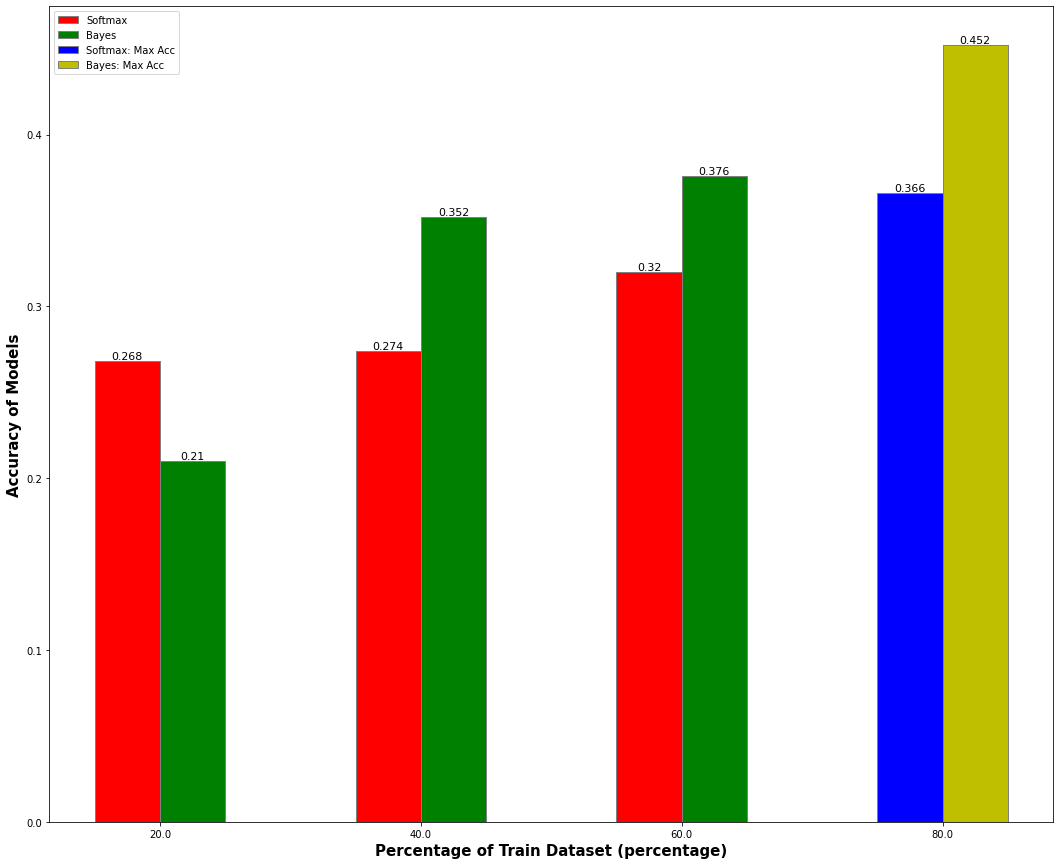

In [41]:
# best hyperparameters observed from previous results (ngroups)
reg_model = LogisticRegression(penalty="l1",C=1.3,solver="liblinear",max_iter=800)
byes_model = MultinomialNaiveBayes(alpha=0.1)
plot_fitdata(percent_list,reg_model,byes_model,x_train_ngroups,y_train_ngroups,x_test_ngroups,y_test_ngroups)

### Sentiment140 dataset

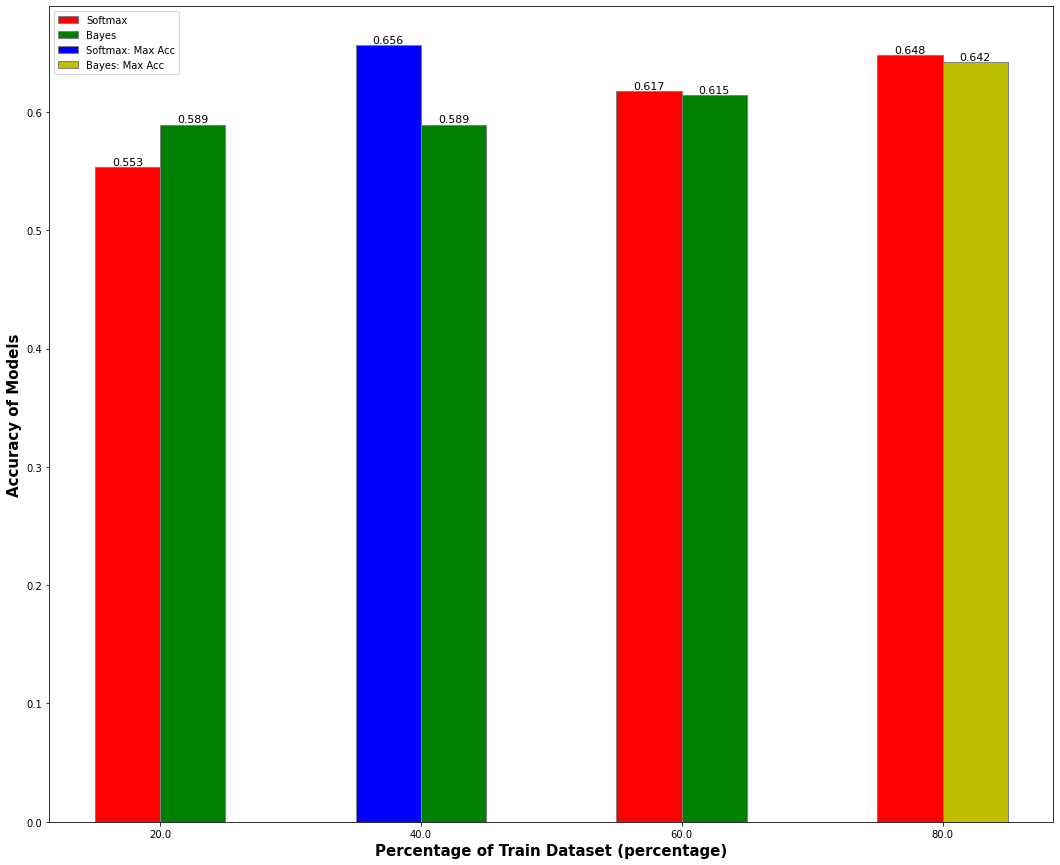

In [42]:
# best hyperparameters observed from previous results (sentiment)
reg_model = LogisticRegression(penalty="l1",C=1.6,solver="liblinear",max_iter=800)
byes_model = MultinomialNaiveBayes(alpha=0.1)
plot_fitdata(percent_list,reg_model,byes_model,x_train_sentiment,y_train_sentiment,x_test_sentiment,y_test_sentiment)